In [2]:
import cv2
import PIL

In [9]:
cap = cv2.VideoCapture('org_bmw.mp4')

frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
fps    = cap.get(cv2.CAP_PROP_FPS)


frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
fps    = cap.get(cv2.CAP_PROP_FPS)


c= 0
while True:
    ret, frame = cap.read()
    if not ret:
        break




    if c==5:
        cv2.imwrite( "img_from_compressed_video/video_5.jpg" , frame )
    if c==55:
        cv2.imwrite( "img_from_compressed_video/video_55.jpg" , frame)
    if c==105:
        cv2.imwrite( "img_from_compressed_video/video_105.jpg" , frame)

    if (c% 100 ==0):
        print(c)

    c+=1
    
cap.release()

print("EEEEE " , frame_count)

0
100
EEEEE  137


In [27]:
import numpy as np
from skimage import img_as_float
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

def calculate_psnr(img1, img2):
    # Convert images to float
   
    img1 = img_as_float(img1)
    img2 = img_as_float(img2)
    # Calculate PSNR
    psnr = peak_signal_noise_ratio(img1, img2)
    return psnr

def calculate_ssim(img1, img2):
    # Convert images to float
    img1 = img_as_float(img1)
    img2 = img_as_float(img2)

    # Calculate SSIM
    ssim = structural_similarity(img1[:,:,1], img2[:,:,1] , data_range=img1.max() - img1.min())
    return ssim

# Example usage
image1 = cv2.imread("img_from_compressed_video/video_105.jpg")
image2 = cv2.imread("img_from_compressed_video/image_105.png")

print(image1.shape)
psnr = calculate_psnr(image1, image2)
ssim = calculate_ssim(image1, image2)

print(f"PSNR: {psnr:.2f}")
print(f"SSIM: {ssim:.4f}")

(1080, 1920, 3)
PSNR: 36.91
SSIM: 0.9722


In [25]:
import cv2
import os
from natsort import natsorted


def create_video_from_frames(directory, video_name):
    frames = []
    
    # Read all frame filenames from the directory
    sorted_items = os.listdir(directory)
    sorted_items = natsorted(sorted_items)

    for filename in sorted_items:
        if filename.endswith(".png") or filename.endswith(".jpg"):
            frame_path = os.path.join(directory, filename)
            frame = cv2.imread(frame_path)
            
            if frame is not None:
                frames.append(frame)
    
    # Define the video codec, output format, and frame rate
    fourcc = cv2.VideoWriter_fourcc(*"mp4v")
    video = cv2.VideoWriter(video_name, fourcc, 50, (frames[0].shape[1], frames[0].shape[0]))
    video.set(cv2.VideoWriter.QUALITY, 98)  # Set the quality to 80 (range: 0-100)
    video.set(cv2.VideoWriter.BITRATE, 5000000)
    
    # Write frames to the video
    for frame in frames:
        video.write(frame)
    
    # Release the video writer and destroy any remaining windows
    video.release()
    cv2.destroyAllWindows()

# Provide the directory path where the frames are stored
directory_path = "IMG_4384__8483"

# Provide the desired output video name
output_video_name = "org_bmw0.mp4"

# Call the function to create the video
create_video_from_frames(directory_path, output_video_name)

AttributeError: type object 'cv2.VideoWriter' has no attribute 'QUALITY'

## stab

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from stabilize import *

#load the images and create a plot of the trajectory
imgs, name = load_images('octo_sampling_org.mp4', OUT_PATH='ou/'), 'result1'

ws = create_warp_stack(imgs)

i,j = 0,2
plt.scatter(np.arange(len(ws)), ws[:,i,j], label='X Velocity')
plt.plot(np.arange(len(ws)), ws[:,i,j])
plt.scatter(np.arange(len(ws)), np.cumsum(ws[:,i,j], axis=0), label='X Trajectory')
plt.plot(np.arange(len(ws)), np.cumsum(ws[:,i,j], axis=0))
plt.legend()
plt.xlabel('Frame')
plt.savefig(name+'_trajectory.png')

#calculate the smoothed trajectory and output the zeroed images
smoothed_warp, smoothed_trajectory, original_trajectory = moving_average(ws, sigma_mat= np.array([[1000,15, 10],[15,1000, 10]]))
new_imgs = apply_warping_fullview(images=imgs, warp_stack=ws-smoothed_warp, PATH='./out/')

#plot the original and smoothed trajectory
f, (a0, a1) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[1, 1]})

i,j = 0,2
a0.scatter(np.arange(len(original_trajectory)), np.array(original_trajectory)[:,i,j], label='Original')
a0.plot(np.arange(len(original_trajectory)), np.array(original_trajectory)[:,i,j])
a0.scatter(np.arange(len(smoothed_trajectory)), np.array(smoothed_trajectory)[:,i,j], label='Smoothed')
a0.plot(np.arange(len(smoothed_trajectory)), np.array(smoothed_trajectory)[:,i,j])
a0.legend()
a0.set_ylabel('X trajectory')
a0.xaxis.set_ticklabels([])

i,j = 0,1
a1.scatter(np.arange(len(original_trajectory)), np.array(original_trajectory)[:,i,j], label='Original')
a1.plot(np.arange(len(original_trajectory)), np.array(original_trajectory)[:,i,j])
a1.scatter(np.arange(len(smoothed_trajectory)), np.array(smoothed_trajectory)[:,i,j], label='Smoothed')
a1.plot(np.arange(len(smoothed_trajectory)), np.array(smoothed_trajectory)[:,i,j])
a1.legend()
a1.set_xlabel('Frame')
a1.set_ylabel('Sin(Theta) trajectory')
plt.savefig(name+'_smoothed.png')

#create a images that show both the trajectory and video frames
filenames = imshow_with_trajectory(images=new_imgs, warp_stack=ws-smoothed_warp, PATH='ou'+'/', ij=(0,2))

#create gif
create_gif(filenames, './'+name+'.gif')

21

# modified

bottom 22
top 48
right 22
left 5


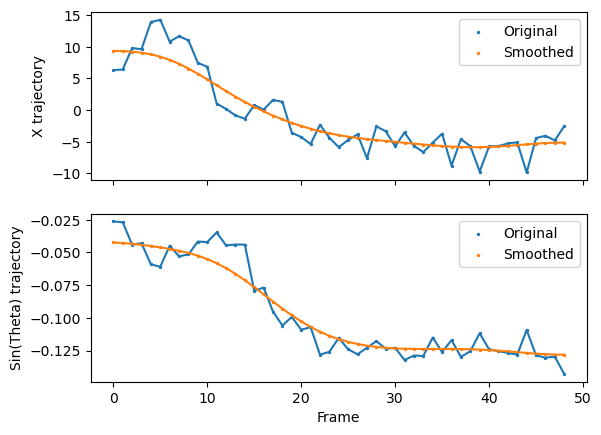

In [2]:
import cv2 , os
from natsort import natsorted
import numpy as np
import matplotlib.pyplot as plt
from stabilize import *

name = "result"

imgs = []

directory = "OUT1/octo-sampling-model_out"

# Read all frame filenames from the directory
sorted_items = os.listdir(directory)
sorted_items = natsorted(sorted_items)
for filename in sorted_items:
    if filename.endswith(".png") or filename.endswith(".jpg"):
        frame_path = os.path.join(directory, filename)
        frame = cv2.imread(frame_path)
        
        if frame is not None:
            imgs.append(frame)



ws = create_warp_stack(imgs)



#calculate the smoothed trajectory and output the zeroed images
smoothed_warp, smoothed_trajectory, original_trajectory = moving_average(ws, sigma_mat= np.array([[5,5, 5],[5 , 5 , 5]]))
new_imgs = apply_warping_fullview(images=imgs, warp_stack=ws-smoothed_warp, PATH='./out/')




    # Define the video codec, output format, and frame rate
fourcc = cv2.VideoWriter_fourcc(*"mp4v")
video = cv2.VideoWriter("octo_combined_sampling10xx.mp4", fourcc, 8, (new_imgs[0].shape[1], new_imgs[0].shape[0]))

# Write frames to the video
for frame in new_imgs:
   video.write(frame)

# Release the video writer and destroy any remaining windows
video.release()
cv2.destroyAllWindows()

#plot the original and smoothed trajectory
f, (a0, a1) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[1, 1]})

i,j = 0,2
a0.scatter(np.arange(len(original_trajectory)), np.array(original_trajectory)[:,i,j],s=2 , label='Original')
a0.plot(np.arange(len(original_trajectory)), np.array(original_trajectory)[:,i,j])
a0.scatter(np.arange(len(smoothed_trajectory)), np.array(smoothed_trajectory)[:,i,j], s=2 , label='Smoothed')
a0.plot(np.arange(len(smoothed_trajectory)), np.array(smoothed_trajectory)[:,i,j])
a0.legend()
a0.set_ylabel('X trajectory')
a0.xaxis.set_ticklabels([])

i,j = 0,1
a1.scatter(np.arange(len(original_trajectory)), np.array(original_trajectory)[:,i,j],s=2, label='Original')
a1.plot(np.arange(len(original_trajectory)), np.array(original_trajectory)[:,i,j])
a1.scatter(np.arange(len(smoothed_trajectory)), np.array(smoothed_trajectory)[:,i,j],s=2, label='Smoothed')
a1.plot(np.arange(len(smoothed_trajectory)), np.array(smoothed_trajectory)[:,i,j])
a1.legend()
a1.set_xlabel('Frame')
a1.set_ylabel('Sin(Theta) trajectory')
plt.savefig(name+'_smoothed.png')

#create a images that show both the trajectory and video frames
filenames = imshow_with_trajectory(images=new_imgs, warp_stack=ws-smoothed_warp, PATH='ou'+'/', ij=(0,2))

#create gif
# create_gif(filenames, './'+name+'.gif')

In [10]:
len(imgs)
imgs[0].shape

(540, 960, 3)

In [14]:
fourcc = cv2.VideoWriter_fourcc(*"mp4v")
video = cv2.VideoWriter("oooZZ2.mp4", fourcc, 8, (imgs[0].shape[1], imgs[0].shape[0]))

print("HHHHHHHHHHHHHH",len(imgs))
# Write frames to the video
for frame in imgs:
   video.write(frame)

# Release the video writer and destroy any remaining windows
video.release()
cv2.destroyAllWindows()

HHHHHHHHHHHHHH 50


# optical flow